# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url)
     
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | constantia
Processing Record 7 of Set 1 | ixtapa
Processing Record 8 of Set 1 | naze
Processing Record 9 of Set 1 | udachny
Processing Record 10 of Set 1 | kutum
Processing Record 11 of Set 1 | la passe
Processing Record 12 of Set 1 | zhanaozen
Processing Record 13 of Set 1 | cuencame de ceniceros
Processing Record 14 of Set 1 | alice springs
Processing Record 15 of Set 1 | dickinson
Processing Record 16 of Set 1 | pontes e lacerda
Processing Record 17 of Set 1 | la'ie
Processing Record 18 of Set 1 | kununurra
Processing Record 19 of Set 1 | mount gambier
Processing Record 20 of Set 1 | severo-yeniseyskiy
Processing Record 21 of Set 1 | bredasdorp
Processing Record 2

In [4]:
# Convert the cities weather data into a Pandas DataFrame                      
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,12.68,64,10,1.79,NZ,1701746954
1,college,64.8569,-147.8028,-17.53,80,75,2.57,US,1701746955
2,bilibino,68.0546,166.4372,-25.87,100,100,1.16,RU,1701746956
3,bethel,41.3712,-73.4140,5.84,76,92,0.89,US,1701746958
4,constantia,44.1833,28.6500,1.50,68,73,4.52,RO,1701746959


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,12.68,64,10,1.79,NZ,1701746954
1,college,64.8569,-147.8028,-17.53,80,75,2.57,US,1701746955
2,bilibino,68.0546,166.4372,-25.87,100,100,1.16,RU,1701746956
3,bethel,41.3712,-73.4140,5.84,76,92,0.89,US,1701746958
4,constantia,44.1833,28.6500,1.50,68,73,4.52,RO,1701746959


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

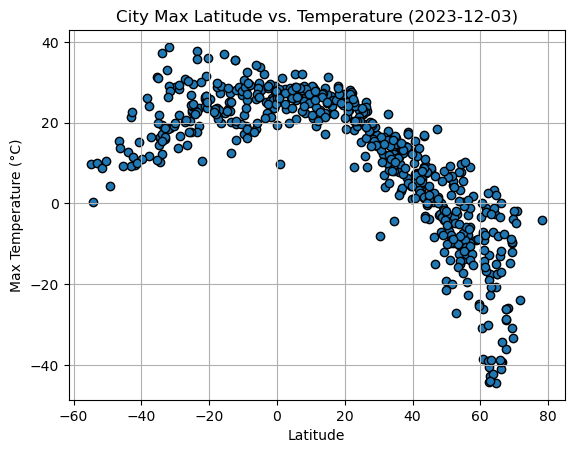

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']

plt.scatter(x_axis, y_axis, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2023-12-03)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)') 
plt.grid()

# # Save the figure
plt.savefig("output_data/Fig1.png")

# # Show plot
plt.show()

#### Latitude Vs. Humidity

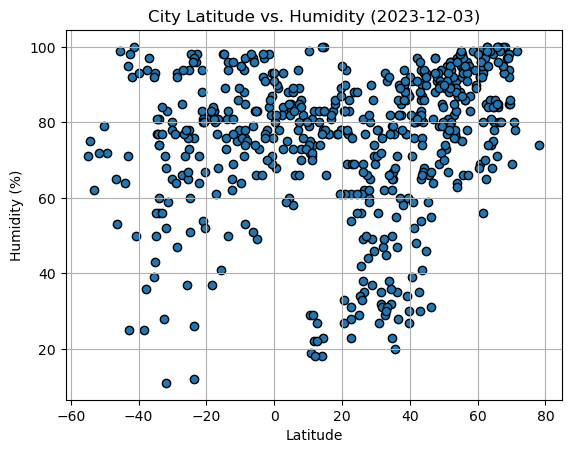

In [9]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

plt.scatter(x_axis, y_axis, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-12-03)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)') 
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

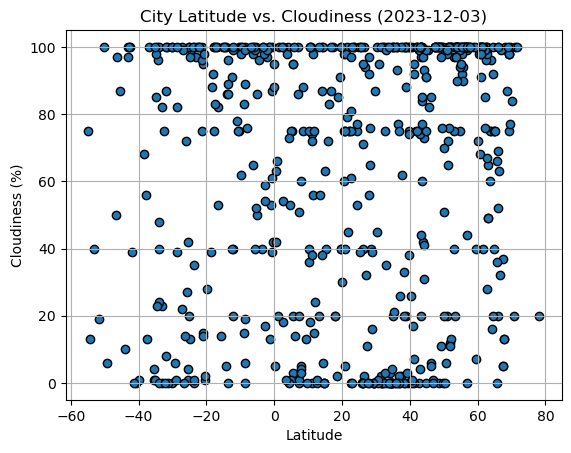

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

plt.scatter(x_axis, y_axis, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-12-03)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)') 
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

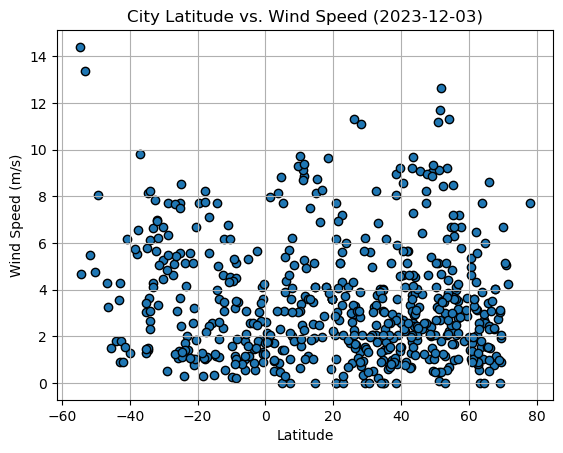

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

plt.scatter(x_axis, y_axis, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-12-03)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)') 
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_regree_plot_func(x_values, y_values, x_label, y_label):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    regressed_values = (slope * x_values) + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regressed_values, color='r')
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    correlation_coefficient = f'The r-value is: {rvalue}'
    return correlation_coefficient
    print(correlation_coefficient)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,college,64.8569,-147.8028,-17.53,80,75,2.57,US,1701746955
2,bilibino,68.0546,166.4372,-25.87,100,100,1.16,RU,1701746956
3,bethel,41.3712,-73.4140,5.84,76,92,0.89,US,1701746958
4,constantia,44.1833,28.6500,1.50,68,73,4.52,RO,1701746959
5,ixtapa,20.7000,-105.2000,24.01,83,75,0.00,MX,1701746959


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,12.68,64,10,1.79,NZ,1701746954
12,alice springs,-23.7000,133.8833,37.75,12,0,5.14,AU,1701746966
14,pontes e lacerda,-15.2261,-59.3353,22.45,98,100,0.33,BR,1701746968
16,kununurra,-15.7667,128.7333,36.99,41,14,2.57,AU,1701746969
17,mount gambier,-37.8333,140.7667,24.18,36,56,5.51,AU,1701746970


###  Temperature vs. Latitude Linear Regression Plot

'The r-value is: -0.8657310973830287'

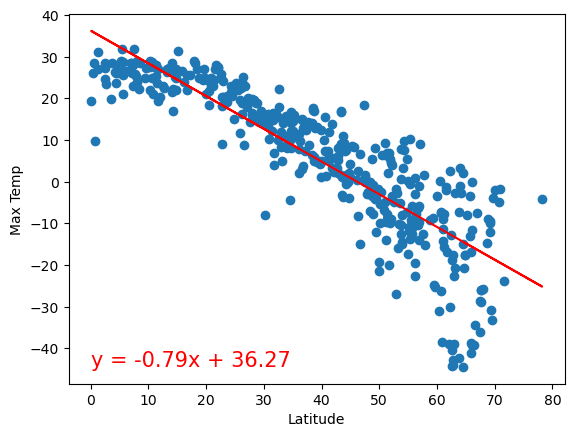

In [15]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Max Temp")

'The r-value is: 0.5352322687775085'

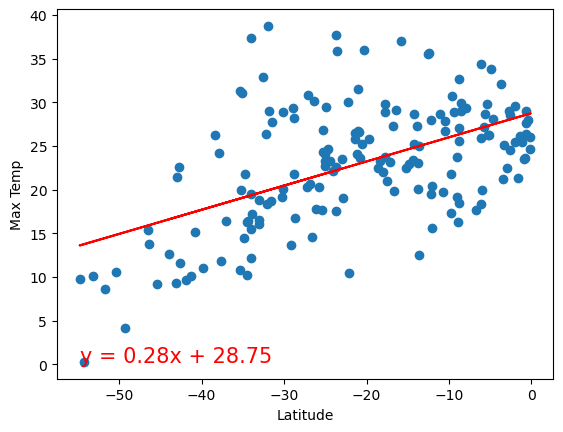

In [16]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Max Temp")

**Discussion about the linear relationship:** The linear relationships in the above two plots show that the temperature is high near the equator. While, the temperature decreases as we move away from the equator.

### Humidity vs. Latitude Linear Regression Plot

'The r-value is: 0.34960232179328615'

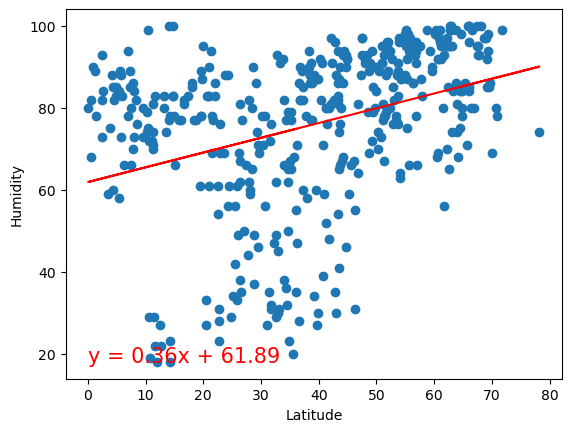

In [17]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Humidity")

'The r-value is: 0.2416697505388379'

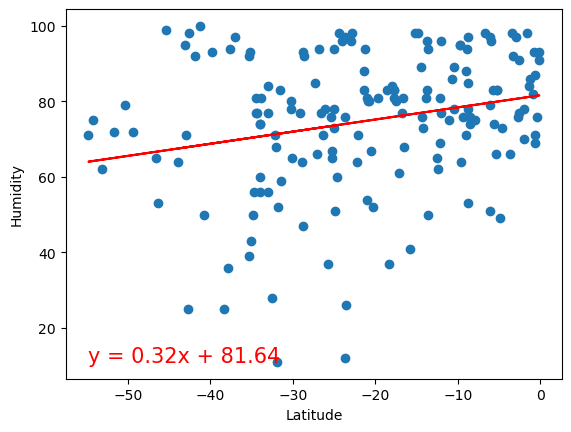

In [18]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Humidity")

**Discussion about the linear relationship:** The linear relationship between Latitude and Humidity clearly shows that in the northern hemisphere, the humidity increases as we move away from the equator. While it decreases in the southern hemisphere if we move away from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

'The r-value is: 0.24788889463273162'

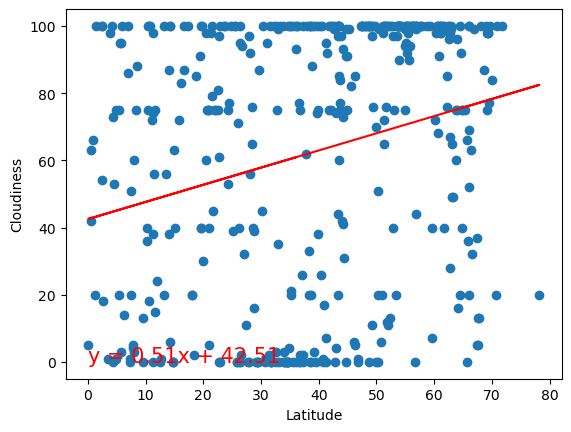

In [19]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Cloudiness")

'The r-value is: 0.23322265833049594'

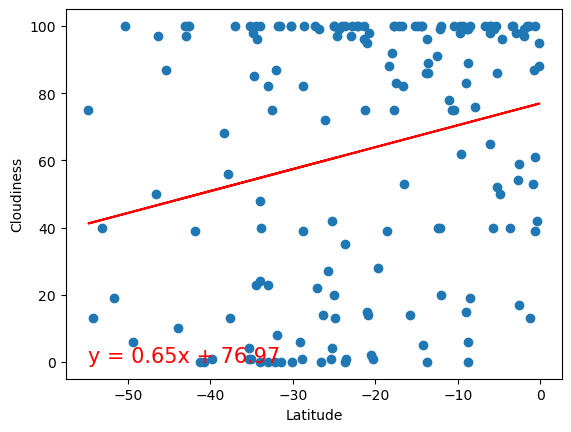

In [20]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Cloudiness")

**Discussion about the linear relationship:** The linear relationship between Latitude and Cloudiness proves that in the northern hemisphere, the cloudiness increases going away from the equator. While it decreases in the southern hemisphere if we move away from the equator.

### Wind Speed vs. Latitude Linear Regression Plot

'The r-value is: -0.02903890211360181'

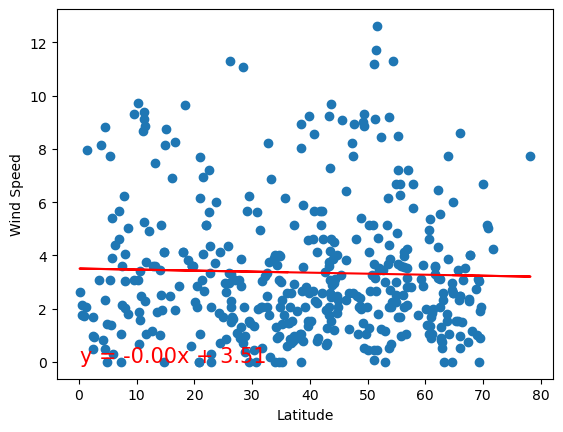

In [21]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Wind Speed")

'The r-value is: -0.3786406407546986'

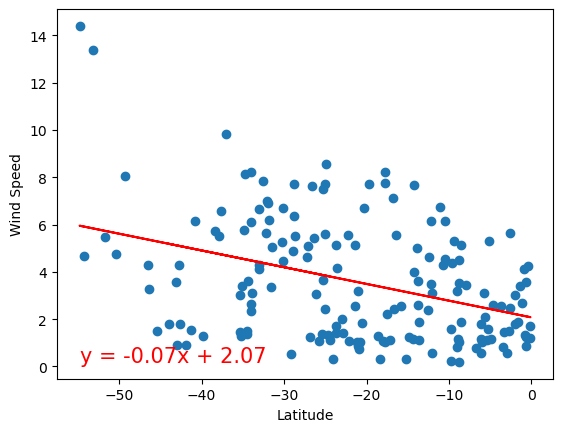

In [22]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Wind Speed")

**Discussion about the linear relationship:** The linear relationship between Latitude and Windspeed states that in the northern hemisphere, the wind speed remains almost constant as we move away from the equator. While it increases in the southern hemisphere if we move away from the equator.